# **02 - Sale Price Study**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

Change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [ ]:
import os
current_dir = os.getcwd()
current_dir

Make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [ ]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

Confirm the new current directory

In [ ]:
current_dir = os.getcwd()
current_dir

# Load Data

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/house_prices_records.csv")
    )
df.head(3)

---

# Data Exploration

Get more familiar with the dataset, check variable type and distribution, missing levels and what these variables mean in a business context

In [ ]:
from pandas_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

---

# Correlation Study

Perform both Pearson and Spearman correlation studies.

## Pearson

In [ ]:
df_corr = df.corr(method='pearson')
df_corr.filter(['SalePrice']).sort_values(by='SalePrice', key=abs, ascending=False)

In [ ]:
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, axes = plt.subplots(figsize=(8,8))
sns.heatmap(data=df_corr, annot=True, mask=mask, cmap='viridis', annot_kws={"size": 8}, linewidths=0.5)
plt.ylim(df_corr.shape[1], 0) # it sets the y axis limits
plt.show()

Plot Correlation with a threshold of 0.4

In [ ]:
def heatmap_corr(data, threshold, figsize=(8,8), annot_size=8):
  mask = np.zeros_like(data, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  mask[abs(data) < threshold] = True

  fig, axes = plt.subplots(figsize=(8,8))
  sns.heatmap(data=data, annot=True, xticklabels=True, yticklabels=True,
              mask=mask, cmap='viridis', annot_kws={"size": annot_size}, ax=axes,
              linewidth=0.5
                    )
  plt.ylim(len(data.columns),0)
  plt.show()

In [ ]:
heatmap_corr(data= df_corr, threshold=0.4)

Plot the same Correlation but with a threshold of 0.6

In [ ]:
heatmap_corr(data= df_corr, threshold=0.6)

## Spearman

In [ ]:
df_corr_spearman = df.corr(method='spearman')
df_corr_spearman

Plot Correlation with a threshold of 0.6

In [ ]:
heatmap_corr(data= df_corr_spearman, threshold=0.6)

Correlation Overview

In [ ]:
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

In [ ]:
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

In [ ]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

In [ ]:
vars_to_study = ['1stFlrSF', 'GarageArea', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']
vars_to_study

# Predictive Power Scores

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import ppscore as pps

Calculate PPS

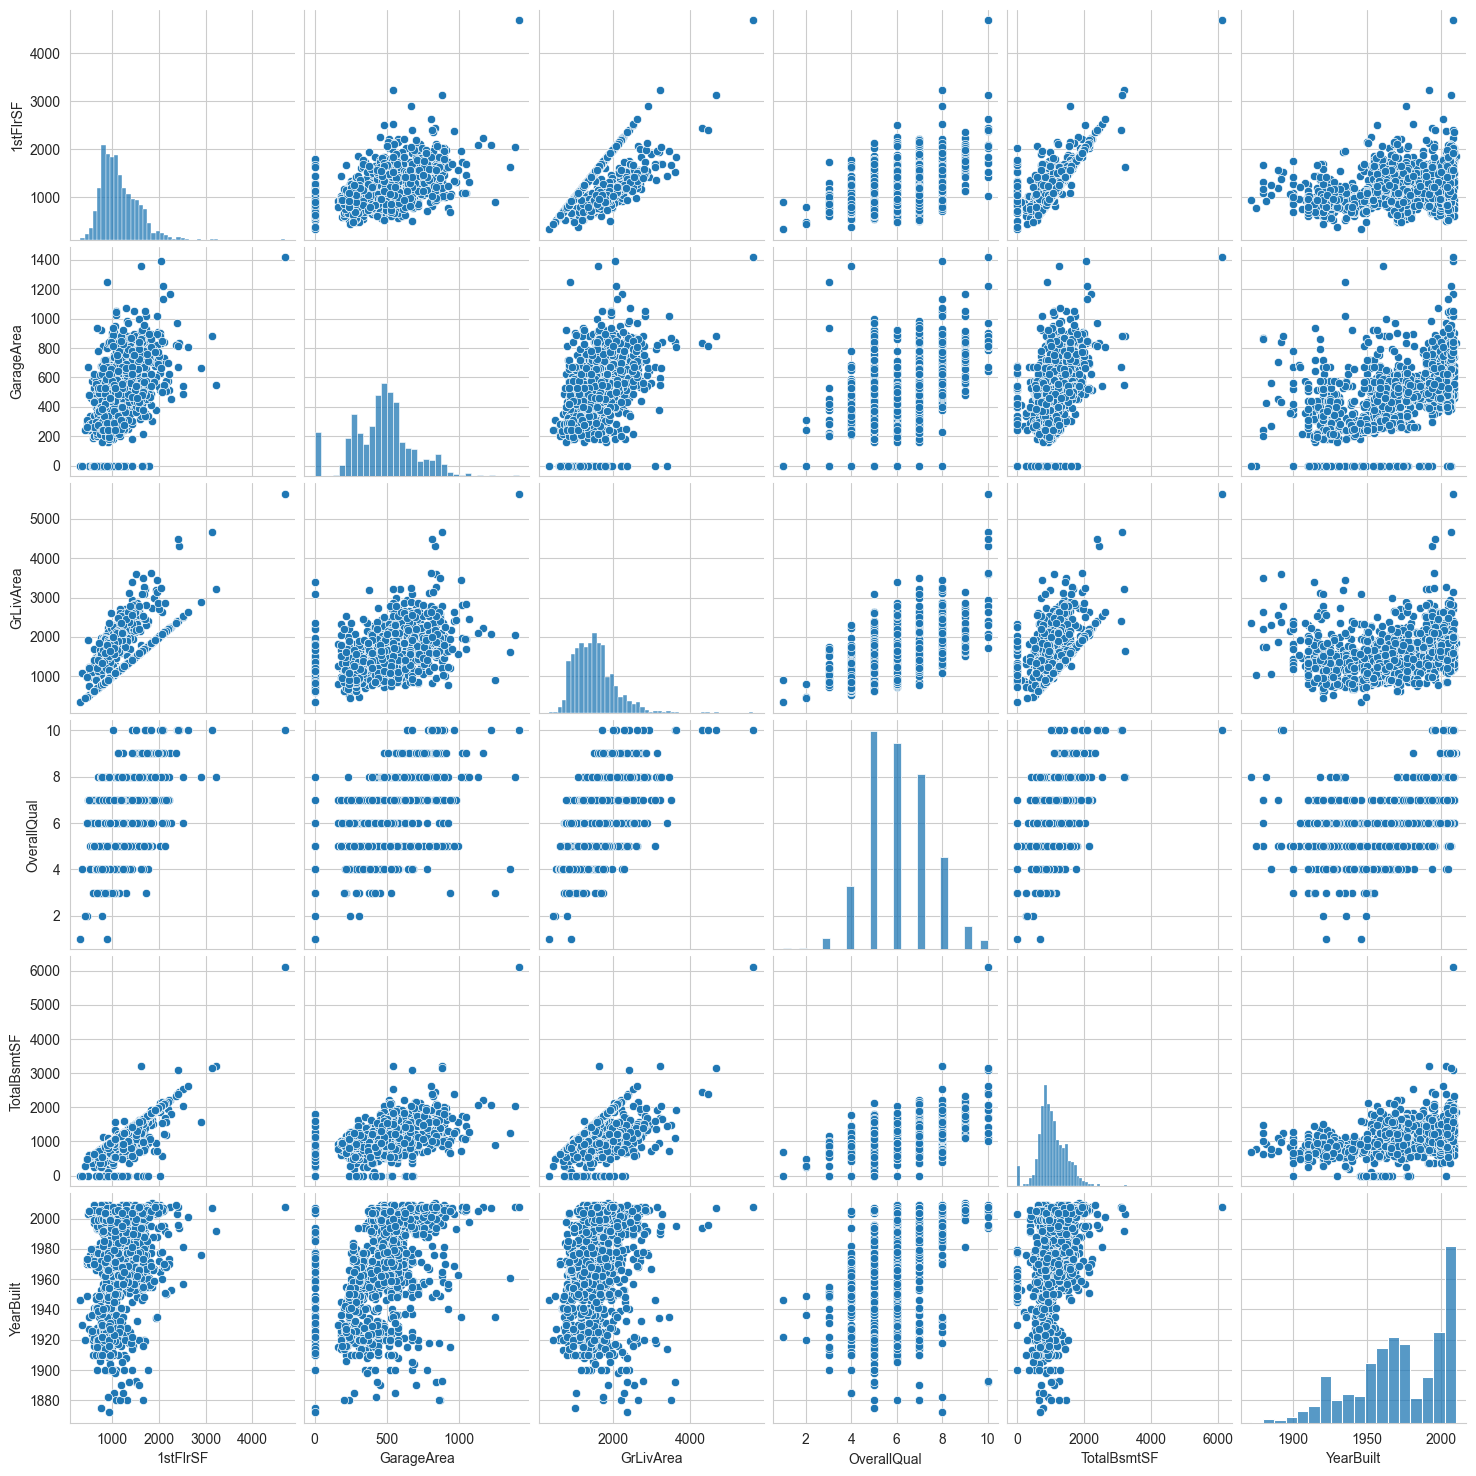

In [40]:
df_selected = df[vars_to_study]
sns.pairplot(data=df_selected)

PPS Matrix

In [41]:
pps.matrix(df=df_selected)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,1stFlrSF,1stFlrSF,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,1stFlrSF,GarageArea,0.000000,regression,True,mean absolute error,159.933562,187.918545,DecisionTreeRegressor()
2,1stFlrSF,GrLivArea,0.056844,regression,True,mean absolute error,394.532192,372.105375,DecisionTreeRegressor()
3,1stFlrSF,OverallQual,0.000000,regression,True,mean absolute error,1.073288,1.129780,DecisionTreeRegressor()
4,1stFlrSF,TotalBsmtSF,0.437103,regression,True,mean absolute error,317.032192,178.456529,DecisionTreeRegressor()
5,1stFlrSF,YearBuilt,0.000000,regression,True,mean absolute error,25.041781,27.663340,DecisionTreeRegressor()
6,GarageArea,1stFlrSF,0.027990,regression,True,mean absolute error,294.177397,285.943460,DecisionTreeRegressor()
7,GarageArea,GarageArea,1.000000,predict_itself,True,None,0.000000,1.000000,None
8,GarageArea,GrLivArea,0.034742,regression,True,mean absolute error,394.532192,380.825441,DecisionTreeRegressor()
9,GarageArea,OverallQual,0.136022,regression,True,mean absolute error,1.073288,0.927296,DecisionTreeRegressor()


In [42]:
pps_matrix_raw = pps.matrix(df_selected)
pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')
pps_matrix

x,1stFlrSF,GarageArea,GrLivArea,OverallQual,TotalBsmtSF,YearBuilt
y,,,,,,
1stFlrSF,1.000000,0.027990,0.102077,0.139384,0.578866,0.072221
GarageArea,0.000000,1.000000,0.000000,0.176314,0.000000,0.108678
GrLivArea,0.056844,0.034742,1.000000,0.189052,0.002524,0.060807
OverallQual,0.000000,0.136022,0.019643,1.000000,0.050124,0.278965
TotalBsmtSF,0.437103,0.017669,0.000000,0.153661,1.000000,0.099232
YearBuilt,0.000000,0.215472,0.000000,0.282367,0.000000,1.000000


In [43]:
def heatmap_pps(df,threshold, figsize=(8,8), font_annot = 10):
    if len(df.columns) > 1:

      mask = np.zeros_like(df, dtype=np.bool)
      mask[abs(df) < threshold] = True

      fig, ax = plt.subplots(figsize=figsize)
      ax = sns.heatmap(df, annot=True, annot_kws={"size": font_annot},
                       mask=mask,cmap='rocket_r', linewidth=0.05,
                       linecolor='lightgrey')
      
      plt.ylim(len(df.columns),0)
      plt.show()

/var/folders/vg/xr2t0ncx7c98wfntvs622gs80000gn/T/ipykernel_45083/2297462975.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


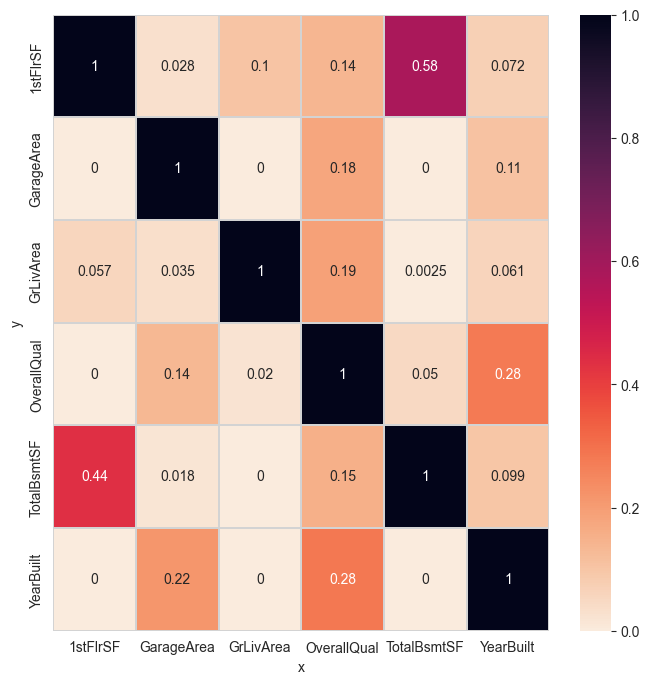

In [44]:
heatmap_pps(df=pps_matrix, threshold=0)

In [45]:
pps_matrix_raw

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,1stFlrSF,1stFlrSF,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,1stFlrSF,GarageArea,0.000000,regression,True,mean absolute error,159.933562,187.918545,DecisionTreeRegressor()
2,1stFlrSF,GrLivArea,0.056844,regression,True,mean absolute error,394.532192,372.105375,DecisionTreeRegressor()
3,1stFlrSF,OverallQual,0.000000,regression,True,mean absolute error,1.073288,1.129780,DecisionTreeRegressor()
4,1stFlrSF,TotalBsmtSF,0.437103,regression,True,mean absolute error,317.032192,178.456529,DecisionTreeRegressor()
5,1stFlrSF,YearBuilt,0.000000,regression,True,mean absolute error,25.041781,27.663340,DecisionTreeRegressor()
6,GarageArea,1stFlrSF,0.027990,regression,True,mean absolute error,294.177397,285.943460,DecisionTreeRegressor()
7,GarageArea,GarageArea,1.000000,predict_itself,True,None,0.000000,1.000000,None
8,GarageArea,GrLivArea,0.034742,regression,True,mean absolute error,394.532192,380.825441,DecisionTreeRegressor()
9,GarageArea,OverallQual,0.136022,regression,True,mean absolute error,1.073288,0.927296,DecisionTreeRegressor()


In [46]:
pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T

,count,mean,std,min,25%,50%,75%,max
ppscore,30.0,0.107992,0.13872,0.0,0.000631,0.058825,0.150092,0.578866


/var/folders/vg/xr2t0ncx7c98wfntvs622gs80000gn/T/ipykernel_45083/2297462975.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


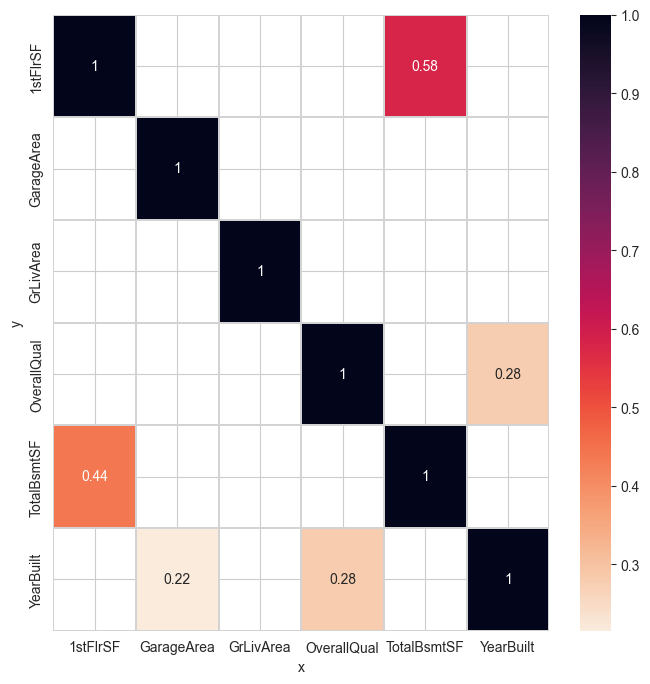

In [50]:
heatmap_pps(df=pps_matrix, threshold=0.19)

### Store Heatmap

In [ ]:
version = 'v1'
file_path = f'outputs/house_prices_study/{version}'

try:
  os.makedirs(name=file_path)
except Exception as e:
  print(e)

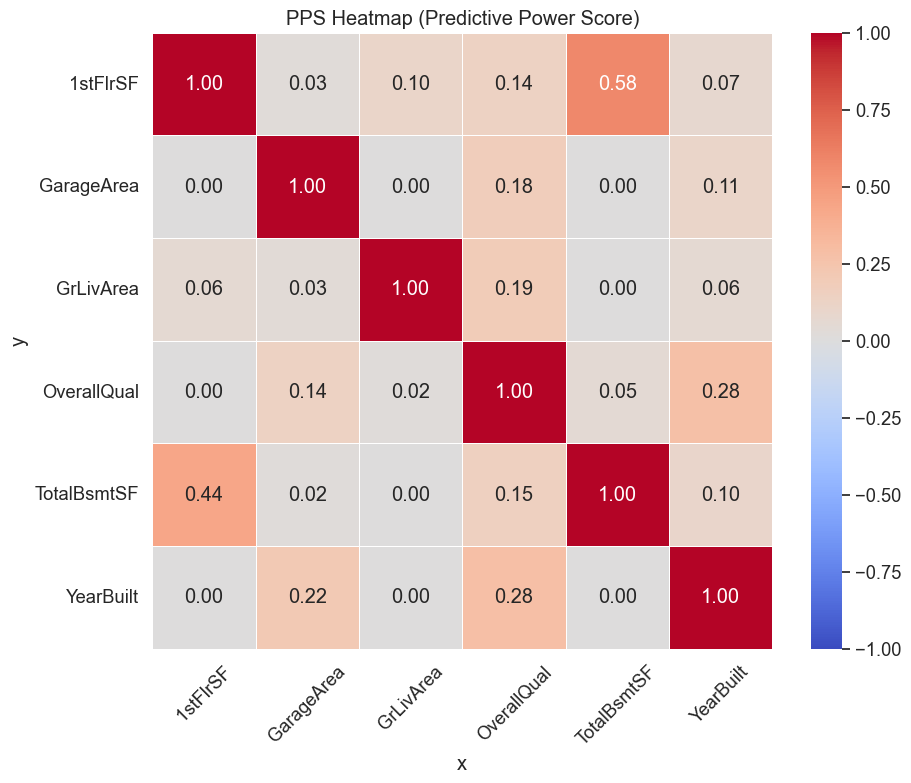

In [53]:

def heatmap_pps(df, threshold):
    # Create the heatmap using seaborn
    sns.set(font_scale=1.2)
    plt.figure(figsize=(10, 8))
    sns.heatmap(df, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)

    # Apply the threshold and title
    plt.title("PPS Heatmap (Predictive Power Score)")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

    # Save the heatmap image
    plt.savefig(f'{file_path}/pps_heatmap.png', bbox_inches="tight")

# Call the function to generate the heatmap
heatmap_pps(df=pps_matrix, threshold=0.19)


# Combine Corr and PPS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps

def heatmap_corr(df,threshold, figsize=(20,12), font_annot = 8):
  if len(df.columns) > 1:
    mask = np.zeros_like(df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    mask[abs(df) < threshold] = True

    fig, axes = plt.subplots(figsize=figsize)
    sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                linewidth=0.5
                     )
    axes.set_yticklabels(df.columns, rotation = 0)
    plt.ylim(len(df.columns),0)
    plt.show()


def heatmap_pps(df,threshold, figsize=(20,12), font_annot = 8):
    if len(df.columns) > 1:

      mask = np.zeros_like(df, dtype=np.bool)
      mask[abs(df) < threshold] = True

      fig, ax = plt.subplots(figsize=figsize)
      ax = sns.heatmap(df, annot=True, xticklabels=True,yticklabels=True,
                       mask=mask,cmap='rocket_r', annot_kws={"size": font_annot},
                       linewidth=0.05,linecolor='grey')
      
      plt.ylim(len(df.columns),0)
      plt.show()



def CalculateCorrAndPPS(df):
  df_corr_spearman = df.corr(method="spearman")
  df_corr_pearson = df.corr(method="pearson")

  pps_matrix_raw = pps.matrix(df)
  pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

  pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
  print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
  print(pps_score_stats.round(3))

  return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix,CorrThreshold,PPS_Threshold,
                      figsize=(20,12), font_annot=8 ):

  print("\n")
  print("* Analyze how the target variable for your ML models are correlated with other variables (features and target)")
  print("* Analyze multi colinearity, that is, how the features are correlated among themselves")

  print("\n")
  print("*** Heatmap: Spearman Correlation ***")
  print("It evaluates monotonic relationship \n")
  heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

  print("\n")
  print("*** Heatmap: Pearson Correlation ***")
  print("It evaluates the linear relationship between two continuous variables \n")
  heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

  print("\n")
  print("*** Heatmap: Predictive power Score (PPS) ***")
  print(f"PPS detects linear or non-linear relationships between two columns.\n"
        f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
  heatmap_pps(df=pps_matrix,threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

In [ ]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

In [ ]:
DisplayCorrAndPPS(df_corr_pearson=df_corr_pearson,
                  df_corr_spearman=df_corr_spearman, 
                  pps_matrix=pps_matrix,
                  CorrThreshold=0.6, PPS_Threshold=0.15,
                  figsize=(12,12), font_annot=8)

---

### Scatter Plot

Produce a Scatter Plot of the data

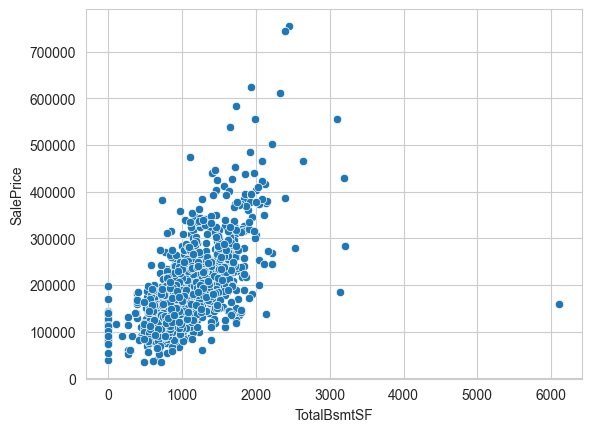

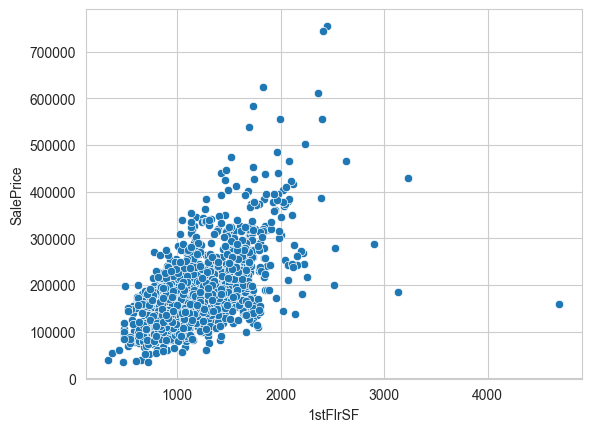

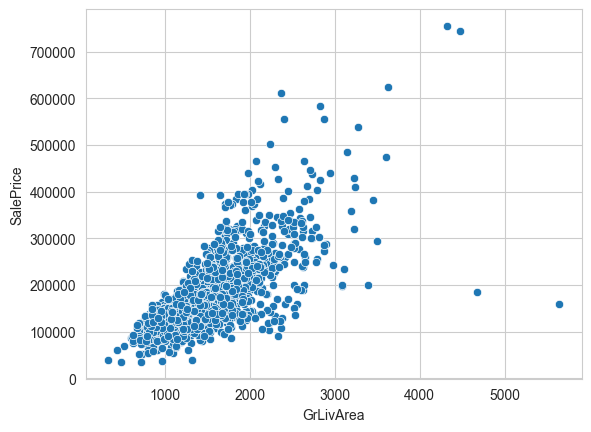

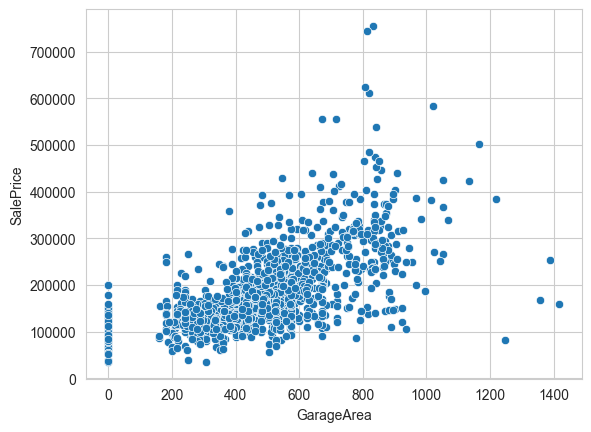

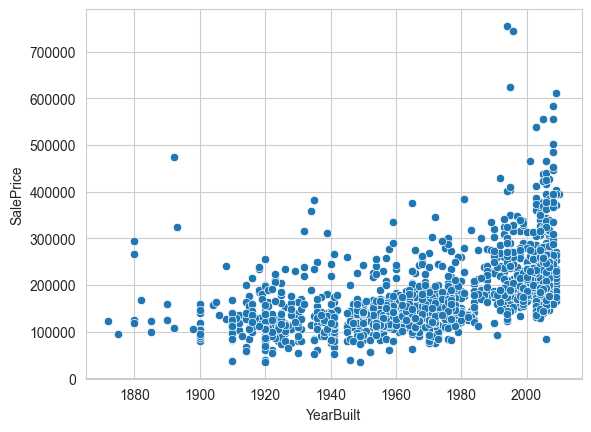

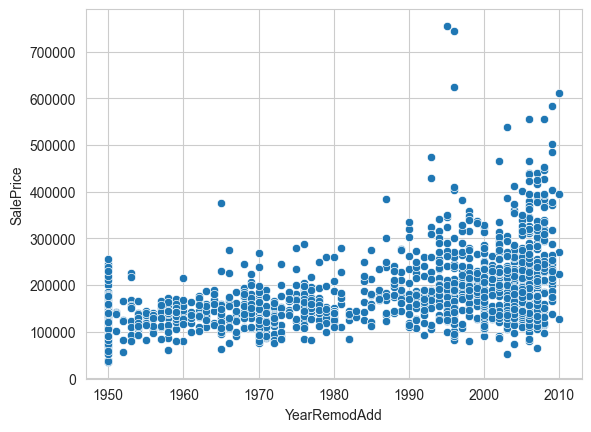

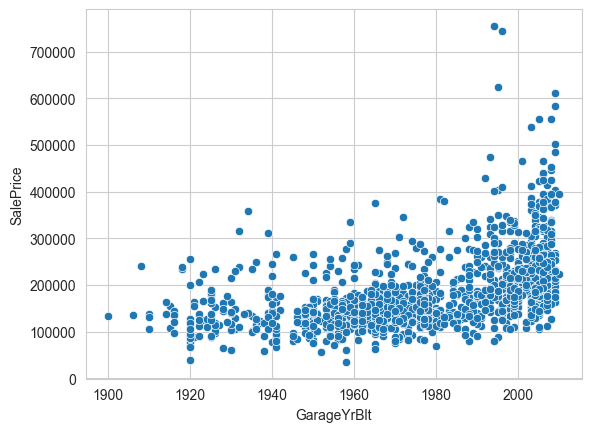

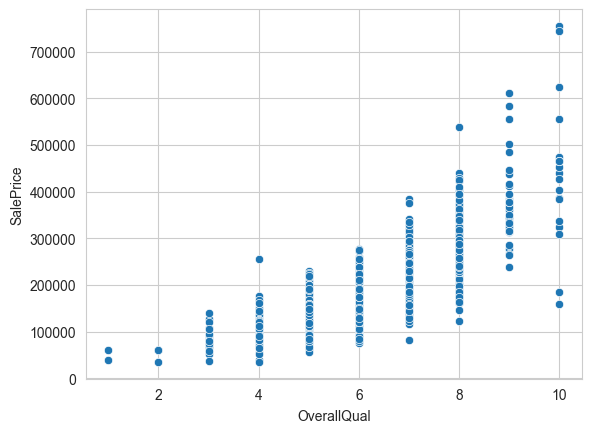

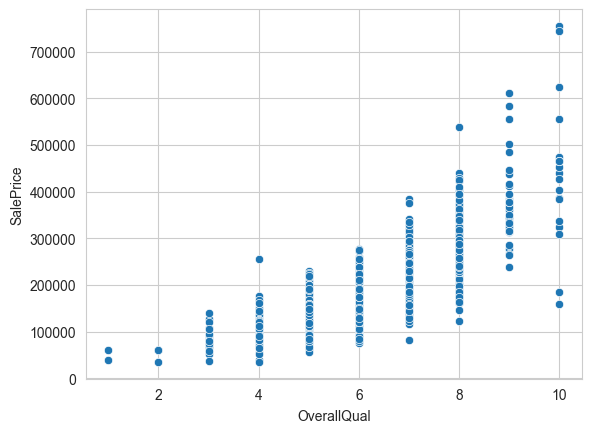

In [38]:
for col in ['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'OverallQual', 'OverallQual']:
  sns.scatterplot(data=df,  x=col, y='SalePrice')
  plt.show()
  print("\n")

# Explore sale price distribution

In [ ]:
# Code from Code Institute Scikit lesson
sns.set_style("whitegrid")
def plot_histogram_and_boxplot(df):
  for col in df.columns:
    fig, axes = plt.subplots(nrows=2 ,ncols=1 ,figsize=(7,7), gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data=df, x=col, ax=axes[0], whis=3)
    sns.histplot(data=df, x=col, kde=True, ax=axes[1])
    fig.suptitle(f"{col} Distribution - Boxplot and Histogram")
    plt.show()

    # An outlier is defined to be outside the box in the boxplot by three times the
    # interquantile distance
    IQR = df[col].quantile(q=0.75) - df[col].quantile(q=0.25)
    print(
        f"This is the range where a datapoint is not an outlier: from "
        f"{(df[col].quantile(q=0.25) - 3*IQR).round(2)} to "
        f"{(df[col].quantile(q=0.75) + 3*IQR).round(2)}")
    print("\n")

In [ ]:
df2=df.filter(['SalePrice'])
plot_histogram_and_boxplot(df2)

The Sale Price distribution has a long right tail.

### Store correlation coefficients dataframes

In [ ]:
import joblib
import os

version = 'v1'
file_path = f'outputs/house_prices_study/{version}'

try:
  os.makedirs(name=file_path)
except Exception as e:
  print(e)

In [ ]:
corr_pearson.to_csv(f"{file_path}/corr_df_rev.csv", index=False)

In [ ]:
corr_spearman.to_csv(f"{file_path}/corr_df_rev.csv", index=False)